# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
# imports and load data
import json
import networkx as nx
import epidemics_helper
import matplotlib.pyplot as plt
import pandas as pd

with open("../data/nyc_augmented_network.json") as file:
    network_data = json.load(file)


In [2]:
G = nx.Graph()
# network_data['nodes'] # list of dicts with keys coordinates and id
def form_nodes(dict):
    return (dict['id'],{'coordinates': dict['coordinates']})
nodes = map(form_nodes ,network_data['nodes'])

G.add_nodes_from(nodes)

def form_edges(dict):
    return (dict['source'],dict['target'])
edges = map(form_edges ,network_data['links'])

G.add_edges_from(edges)


In [3]:
G = nx.Graph()
for dict in network_data['nodes']:
    G.add_node(dict['id'], coordinates = dict['coordinates'])

for dict in network_data['links']:
    G.add_edge(dict['source'],dict['target'])

In [4]:
# simulate epidemic over 100 days
# 1. The first infection is at node 23654
# beta = rate of infection at which nodes infect their neighbors
# gamma = rate at which nodes recover from disease

sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 109.76 days | 109.76 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [5]:
inf_time_nodes = {}
rec_time_nodes = {}
for node in G.nodes():
    inf_time_nodes[node] = sir.inf_time[node]
    rec_time_nodes[node] = sir.rec_time[node]

    # if not infected/recovered value is set to inf
    # inf_time means zeitpunkt der infektion not dauer


EPIDEMIC_TIME = 100
num_nodes = len(G.nodes)
perc_s = {}
perc_i = {}
perc_r = {}

for t in range(EPIDEMIC_TIME):
    s = 0
    i = 0
    r = 0
    for node in G.nodes():
        if inf_time_nodes[node] > t: # not infected nor recovered
            s += 1
        elif rec_time_nodes[node] > t:
            i += 1 # infected but not recovered
        else:
            r += 1
        #print("s: {}, i: {}, r: {}".format(s,i,r))
    perc_s[t] = s / num_nodes
    perc_i[t] = i / num_nodes
    perc_r[t] = r / num_nodes


perc = {}
for t in range(EPIDEMIC_TIME):
    perc[t] = [d[t] for d in [perc_s, perc_i, perc_r]]

In [6]:
df = pd.DataFrame(perc)
df = df.transpose()
df.columns = ['susceptible', 'infected', 'recovered']
df.head()

,susceptible,infected,recovered
0,0.999962,0.000038,0.000000
1,0.975907,0.023262,0.000831
2,0.927155,0.066803,0.006042
3,0.823949,0.158604,0.017446
4,0.684868,0.276764,0.038367


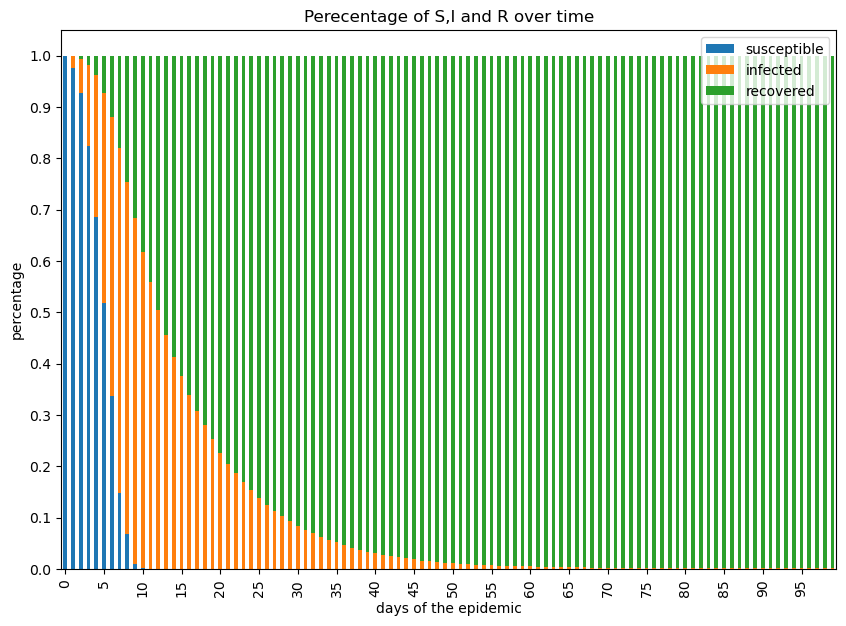

In [7]:
df.plot(kind='bar', stacked=True,title='Perecentage of S,I and R over time',figsize=(10,7))
plt.locator_params(nbins=20)
plt.xlabel("days of the epidemic")
plt.ylabel("percentage")
plt.show()

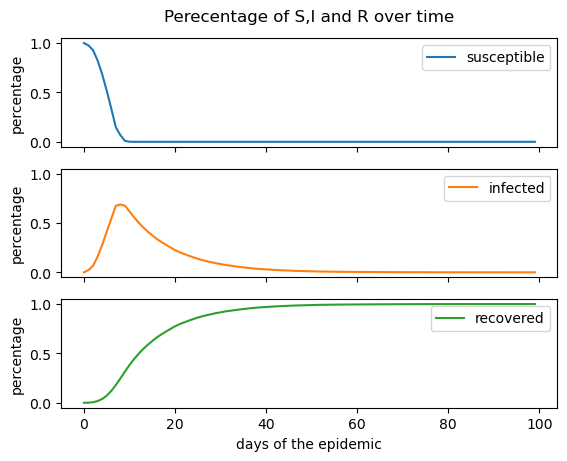

In [8]:
axes = df.plot(rot=0, subplots=True, sharey=True, ylabel='percentage')
plt.xlabel("days of the epidemic")
plt.title('Perecentage of S,I and R over time', pad=200)
plt.show()

In [9]:
# how long until 60% is infected
inf_60 = df.index[df['infected'] >= 0.6].tolist()
print('It takes {} days until 60% are infected.'.format(inf_60[0]))


It takes 7 days until 60% are infected.


In [10]:
# how long until 60% is infected
inf_60 = df.index[df['recovered'] >= 0.6].tolist()
print('It takes {} days until 60% are infected.'.format(inf_60[0]))

It takes 15 days until 60% are infected.


In [11]:
def status_at_time(graph, sir, t): 
    node_status = []
    for node in graph.nodes():
        node_status.append(sir.get_node_status(node, t))
    return node_status


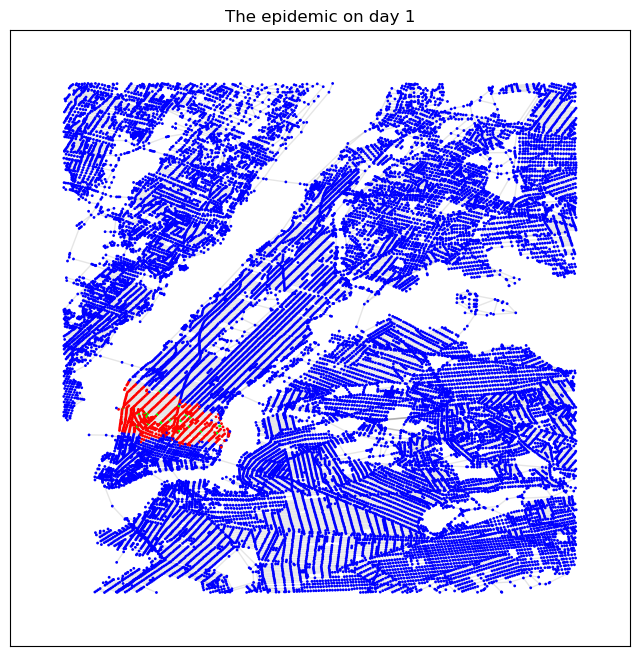

In [12]:
# use coordinates to visualize graph
#nodelist=nodes, plt.colorbar(nc) plt.axis('off')

positions = nx.get_node_attributes(G, 'coordinates')
status = status_at_time(G, sir, 1)

#nx.draw_networkx(G, pos=positions, node_size= 1, with_labels=False, node_color = status_at_time(G, sir, 20))

#plt.figure(figsize=(10,12),  dpi=100)

# define color map. s = green, i = red, r = blue
# color_map = ['green' if elem == 0 else 'red' if  elem == 1 else 'blue' for elem in status]
fig, ax = plt.subplots(figsize=(8,8))
ax = nx.draw_networkx_nodes(G, positions,G.nodes, node_color=status, node_size=1, label=status, cmap='brg')
ax = nx.draw_networkx_edges(G,positions,  alpha=0.2, edge_color= 'grey')
# ax.legend()
plt.title('The epidemic on day 1')
plt.show()



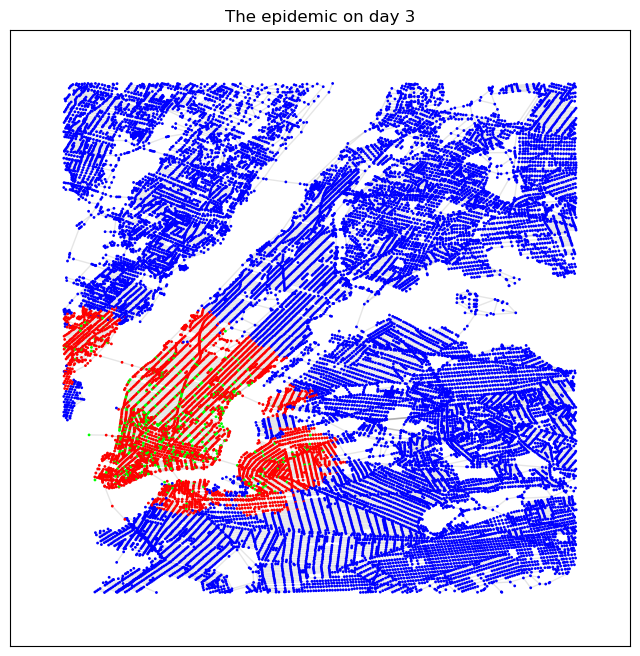

In [13]:
positions = nx.get_node_attributes(G, 'coordinates')
status = status_at_time(G, sir, 3)

#nx.draw_networkx(G, pos=positions, node_size= 1, with_labels=False, node_color = status_at_time(G, sir, 20))

#plt.figure(figsize=(10,12),  dpi=100)
fig, ax = plt.subplots(figsize=(8,8))
ax = nx.draw_networkx_nodes(G, positions,G.nodes, node_color=status, node_size=1, label=status, cmap='brg')
ax = nx.draw_networkx_edges(G,positions,  alpha=0.2, edge_color= 'grey')
# ax.legend()
plt.title('The epidemic on day 3')
plt.show()

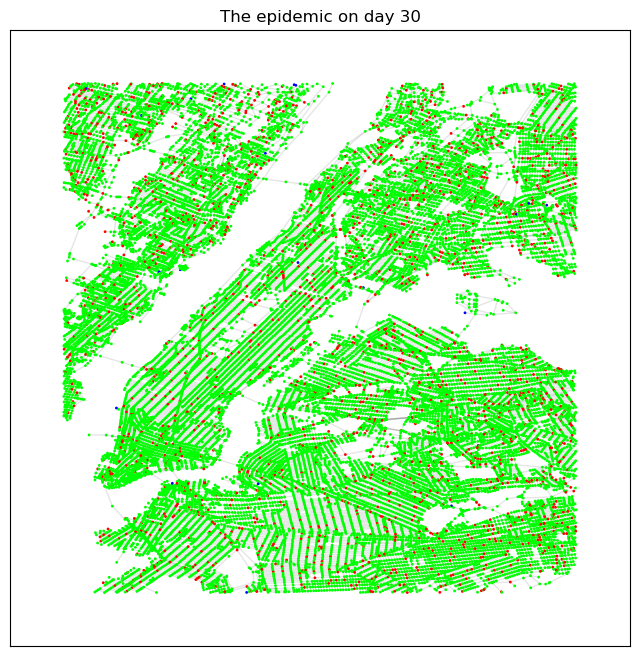

In [14]:
positions = nx.get_node_attributes(G, 'coordinates')
status = status_at_time(G, sir, 30)

#nx.draw_networkx(G, pos=positions, node_size= 1, with_labels=False, node_color = status_at_time(G, sir, 20))

#plt.figure(figsize=(10,12),  dpi=100)
fig, ax = plt.subplots(figsize=(8,8))
ax = nx.draw_networkx_nodes(G, positions,G.nodes, node_color=status, node_size=1, label=status, cmap='brg')
ax = nx.draw_networkx_edges(G,positions,  alpha=0.2, edge_color= 'grey')
# ax.legend()
plt.title('The epidemic on day 30')
plt.show()

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [19]:
# budget of 1000 edges to remove to stop epidemic
import random
import numpy as np
from collections import Counter

random.seed(1)

NUM_SIMULATIONS = 10
edges_to_remove = random.sample(G.edges, 1000)
G_smaller = G.copy()
G_smaller.remove_edges_from(edges_to_remove)

num_s = []
num_i = []
num_r = []

for i in range(NUM_SIMULATIONS):
    source = random.randint(0, len(G_smaller.nodes())-1)

    sir = epidemics_helper.SimulationSIR(G_smaller, beta=10.0, gamma=0.1)
    sir.launch_epidemic(source=source, max_time=100.0)

    status = status_at_time(G_smaller, sir, 30)
    c = Counter(status)
   
    num_s.append(c[0])
    num_i.append(c[1])
    num_r.append(c[2])


print('On average {} are healthy, {} are infected and {} are recovered on day 30 of the pandemic.'.format(np.mean(num_s),np.mean(num_i),np.mean(num_r)))


C:\Users\ann-k\AppData\Local\Temp\ipykernel_18428\243393197.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges, 1000)


Epidemic stopped after 100.72 days | 100.72 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 103.88 days | 103.88 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 101.96 days | 101.96 days elapsed | 0.5% susceptible, 0.0% infected, 99.4% recovered
Epidemic stopped after 101.18 days | 101.18 days elapsed | 0.6% susceptible, 0.0% infected, 99.4% recovered
Epidemic stopped after 101.78 days | 101.78 days elapsed | 0.6% susceptible, 0.0% infected, 99.4% recovered
Epidemic stopped after 103.68 days | 103.68 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 100.84 days | 100.84 days elapsed | 0.6% susceptible, 0.0% infected, 99.4% recovered
Epidemic stopped after 100.34 days | 100.34 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 100.96 days | 100.96 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 103.1

In [20]:
random.seed(1)

NUM_SIMULATIONS = 10
edges_to_remove = random.sample(G.edges, 10000)
G_smaller = G.copy()
G_smaller.remove_edges_from(edges_to_remove)

num_s = []
num_i = []
num_r = []

for i in range(NUM_SIMULATIONS):
    source = random.randint(0, len(G_smaller.nodes())-1)

    sir = epidemics_helper.SimulationSIR(G_smaller, beta=10.0, gamma=0.1)
    sir.launch_epidemic(source=source, max_time=100.0)
   
    status = status_at_time(G_smaller, sir, 30)
    c = Counter(status)
   
    num_s.append(c[0])
    num_i.append(c[1])
    num_r.append(c[2])
    
print('On average {} are healthy, {} are infected and {} are recovered on day 30 of the pandemic.'.format(np.mean(num_s),np.mean(num_i),np.mean(num_r)))


C:\Users\ann-k\AppData\Local\Temp\ipykernel_18428\613886917.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges, 10000)


Epidemic stopped after 112.87 days | 112.87 days elapsed | 83.4% susceptible, 0.0% infected, 16.6% recovered
Epidemic stopped after 111.83 days | 111.83 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 120.05 days | 120.05 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 77.50 days | 77.50 days elapsed | 93.6% susceptible, 0.0% infected, 6.4% recovered
Epidemic stopped after 100.02 days | 100.02 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 5.67 days | 5.67 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
Epidemic stopped after 100.65 days | 100.65 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 105.76 days | 105.76 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 118.51 days | 118.51 days elapsed | 83.3% susceptible, 0.0% infected, 16.7% recovered
Epidemic stopped after 100

In [ ]:
nx.local_bridges(G)

<generator object local_bridges at 0x00000266FB643820>

#### Exercise 2.11: Strategy 2

In [21]:
bridges = list(nx.local_bridges(G))
bridges.sort(key=lambda a: a[2], reverse= True) # sort by span (length shortest path if bridge if removed)
G_without_bridges = G.copy()

NUM_EDGES_REMOVED = 2500
if NUM_EDGES_REMOVED < len(bridges):
    G_without_bridges.remove_edges_from(bridges[:NUM_EDGES_REMOVED])
else:
    G_without_bridges.remove_edges_from(bridges)
    

num_s = []
num_i = []
num_r = []

for i in range(NUM_SIMULATIONS):

    source = random.randint(0, len(G_without_bridges.nodes())-1)

    sir = epidemics_helper.SimulationSIR(G_without_bridges, beta=10.0, gamma=0.1)
    sir.launch_epidemic(source=source, max_time=100.0)
   
    status = status_at_time(G_smaller, sir, 30)
    c = Counter(status)
   
    num_s.append(c[0])
    num_i.append(c[1])
    num_r.append(c[2])

print('On average {} are healthy, {} are infected and {} are recovered on day 30 of the pandemic.'.format(np.mean(num_s),np.mean(num_i),np.mean(num_r)))

# 78,02 stay healthy


Epidemic stopped after 81.97 days | 81.97 days elapsed | 86.2% susceptible, 0.0% infected, 13.8% recovered
Epidemic stopped after 100.93 days | 100.93 days elapsed | 83.6% susceptible, 0.0% infected, 16.4% recovered
Epidemic stopped after 84.06 days | 84.06 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 100.55 days | 100.55 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 87.18 days | 87.18 days elapsed | 83.8% susceptible, 0.0% infected, 16.2% recovered
Epidemic stopped after 100.63 days | 100.63 days elapsed | 58.0% susceptible, 0.0% infected, 42.0% recovered
Epidemic stopped after 82.65 days | 82.65 days elapsed | 83.8% susceptible, 0.0% infected, 16.2% recovered
Epidemic stopped after 77.50 days | 77.50 days elapsed | 86.2% susceptible, 0.0% infected, 13.8% recovered
Epidemic stopped after 103.75 days | 103.75 days elapsed | 86.2% susceptible, 0.0% infected, 13.8% recovered
Epidemic stopped after 111.10

In [ ]:
nx.number_connected_components(G) # 1
nx.number_connected_components(G_without_bridges) # 2349

2349

In [23]:
#26481
19643.6 / len(G_without_bridges)

0.7417997809750386

In [ ]:
23981